Symptom - Based Disease Prediction System Using Machine Learning

In [2]:
#<---------------- Importing modules ----------------->
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
#<------------ Loading The Training Data ------------------>

df=pd.read_csv("home/training.csv")
DF= pd.read_csv('home/training.csv', index_col='prognosis')
DF

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)

In [123]:
#<------------------ Training Data Preprocessing -------------------->

disease_list=list(df['prognosis'].unique())
symptoms_list=list(df)
symptoms_list.pop()
count=0
for i in df.prognosis.unique():
    df.prognosis.replace({i:count},inplace=True)
    count+=1
df.prognosis.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [124]:
#<---------------------Taking Features ----------------------->
X= df[symptoms_list]
y = df[["prognosis"]]

[Text(0.9720767888307156, 0.990909090909091, 'x[120] <= 0.5\ngini = 0.976\nsamples = 4920\nvalue = [120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120]'),
 Text(0.9581151832460733, 0.9727272727272728, 'x[71] <= 0.5\ngini = 0.975\nsamples = 4800\nvalue = [120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 0, 120, 120, 120, 120, 120, 120\n120]'),
 Text(0.944153577661431, 0.9545454545454546, 'x[51] <= 0.5\ngini = 0.974\nsamples = 4680\nvalue = [120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 0, 120, 0, 120, 120, 120, 120, 120, 120, 120]'),
 Text(0.9301919720767888, 0.9363636363636364, 'x[101] <= 0.5\ngini = 0.974\nsamples

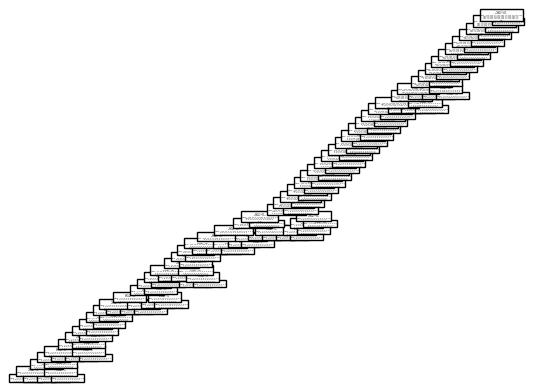

In [125]:
#<------------------- Applying Classifier -------------------->

clf = DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf)

In [126]:
#<------------------- Cross validation ------------------------>

scores1=np.mean(cross_val_score(DecisionTreeClassifier(),X,np.ravel(y),scoring='r2',cv=10))
print('Cross Validation Score of Decision Tree : ',scores1)
scores2=np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5,p=2),X,np.ravel(y),scoring='r2',cv=10))
print('Cross Validation Score of K Nearest Neighbours : ',scores2)

Cross Validation Score of Decision Tree :  1.0
Cross Validation Score of K Nearest Neighbours :  1.0


In [127]:
#<------------------ Testing Data Preprocessing -------------------->

df2=pd.read_csv("home/testing.csv")
DF2= pd.read_csv('home/testing.csv', index_col='prognosis')

disease_list=list(df2['prognosis'].unique())
symptoms_list=list(df2)
symptoms_list.pop()
count=0
for i in df2.prognosis.unique():
    df2.prognosis.replace({i:count},inplace=True)
    count+=1
X_test= df2[symptoms_list]
y_test = df2[["prognosis"]]

In [128]:
#<------------------ Calculating Accuracy Score and Confusion Matrix -------------------------------->

y_pred=clf.predict(X_test)
print('For Decission Tree',accuracy_score(y_test,y_pred),'\n',confusion_matrix(y_test,y_pred),'\n\n')


clf2=KNeighborsClassifier(n_neighbors=10,p=2)
clf2.fit(X,np.ravel(y))
y_pred2=clf2.predict(X_test)
print('For K Nearest Neighbours',accuracy_score(y_test,y_pred2),'\n',confusion_matrix(y_test,y_pred),'\n\n')

For Decission Tree 1.0 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] 


For K Nearest Neighbours 1.0 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] 


